## Task1

In [61]:
#Predict new joiner salary based on company's employee data

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

C:\Users\aksha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [63]:
#importing income dataset. target variable is income bracket and rest are independent features
df=pd.read_csv("DS2_C5_S3_Income_Data_Challenge.csv")
df1=df.copy()
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

In [65]:
df.shape

(32561, 15)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_Per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [67]:
df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [68]:
df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

## Task2

In [69]:
#checking for null values
df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [70]:
l=df.select_dtypes(include="object").columns.tolist()
l

['WorkClass',
 'Education',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Native_Country',
 'Income_Bracket']

In [71]:
#checking for noise
for i in l:
    print("---",i,"---")
    print(df[i].value_counts())

--- WorkClass ---
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64
--- Education ---
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
--- Marital_Status ---
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64
--- Occupat

In [72]:
#removing all "?" from dataframe
for i in l:
    for j in df[i]:
        if j==" ?":
            df[i].replace(" ?",df[i].mode()[0],inplace=True)

In [73]:
#converting objects to category
for i in l:
    df[l]=df[l].astype("category")

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
encoder=LabelEncoder()

In [76]:
#Label encoding to convert categorical into numerical
for i in l:
    df[i]=encoder.fit_transform(df[i])

In [77]:
df["Income_Bracket"].value_counts()

0    24720
1     7841
Name: Income_Bracket, dtype: int64

In [78]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [79]:
#Scaling all independent features using standard scaler

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [81]:
scaler=StandardScaler()

In [82]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [83]:
df=pd.concat([x,y],axis=1)

<AxesSubplot:>

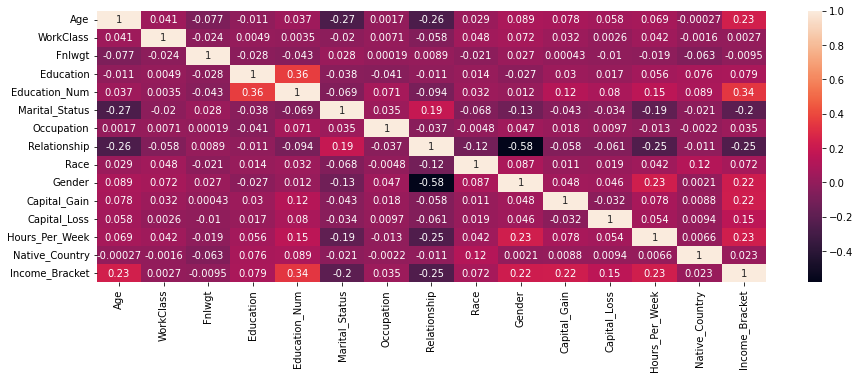

In [84]:
#correlation matrix
c=df.corr()
plt.figure(figsize=(15,5))
sb.heatmap(c,annot=True)

In [85]:
#based on correlation matrix top2 features are education_num,relationship

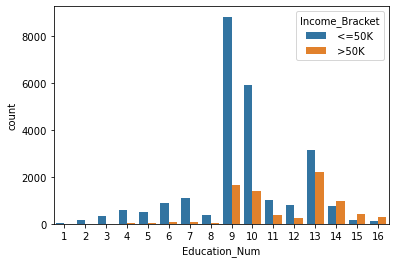

In [86]:
sb.countplot(data=df1,x="Education_Num",hue="Income_Bracket")
plt.show()

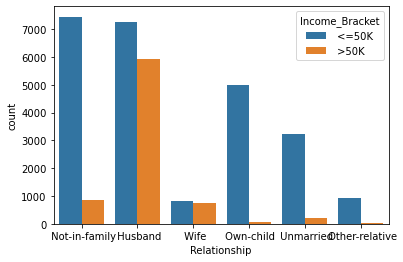

In [87]:
sb.countplot(data=df1,x="Relationship",hue="Income_Bracket")
plt.show()

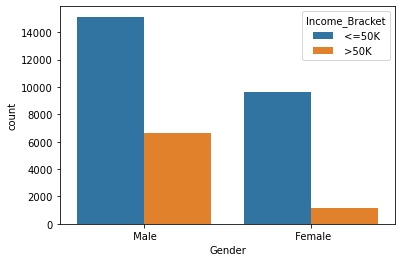

In [88]:
sb.countplot(data=df1,x="Gender",hue="Income_Bracket")
plt.show()

In [89]:
#sb.pairplot(df1)

In [90]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

In [91]:
#considering 3 features for our model
y=df["Income_Bracket"]
x=df[["Education_Num","Relationship","Gender"]]
#x=df.loc[:,df.columns!="Income_Bracket"]

In [92]:
#train test split using row index method in ratio of 80:20
x_i=int(len(x)*0.8)
x_train=x.iloc[:x_i,:]
x_test=x.iloc[x_i:,:]
y_i=int(len(y)*0.8)
y_train=y.iloc[:y_i]
y_test=y.iloc[y_i:]

In [93]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((26048, 3), (6513, 3), (26048,), (6513,))

## Task3

In [94]:
#training the model

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model=LogisticRegression().fit(x_train,y_train)

In [97]:
#MODEL ACCURACY
model.score(x_train,y_train)

0.8125383906633906

In [98]:
#test accuracy
model.score(x_test,y_test)

0.8094580070627975

In [99]:
#slope
model.coef_

array([[ 0.91171835, -0.45436746,  0.391308  ]])

In [100]:
#intercept
model.intercept_

array([-1.48296338])

In [101]:
y_pred=model.predict(x_test)

In [102]:
target=pd.DataFrame({"actual":y_test,"predict":y_pred})

In [103]:
#y predicted and actual
target

,actual,predict
26048,0,0
26049,0,0
26050,1,0
26051,0,0
26052,0,0
...,...,...
32556,0,0
32557,1,0
32558,0,0
32559,0,0


## Task4

In [104]:
#Model Evaluation

In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [106]:
#confusion matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
tn,fp,fn,tp

(4638, 275, 966, 634)

In [107]:
#performance metrics
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred)
r=recall_score(y_test,y_pred)
f=f1_score(y_test,y_pred)
print("accuracy:",a,"\n","precision:",p,"\n","recall:",r,"\n","F1 score:",f)

accuracy: 0.8094580070627975 
 precision: 0.6974697469746974 
 recall: 0.39625 
 F1 score: 0.5053806297329614


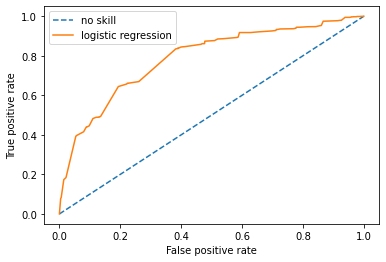

In [108]:
#visualizing  the roc curve
ns_prob=[0 for i in range(len(y_test))]
lr_prob=model.predict_proba(x_test)[:,1]

ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label="no skill")
plt.plot(lr_fpr,lr_tpr,label="logistic regression")

plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [109]:
roc_auc_score(y_test,lr_prob)

0.7873977203338082

In [110]:
#area under the curve is around 0.79 which is greater than our no skill line whcih gives random prediction.
# so we can say roc_auc is nearer to 1 and it is a good model
#our model gave correct prediction for 5272 rows out of 6513

In [115]:
y_test=y_test.to_numpy()

In [122]:
a=y_test
b=y_pred

In [124]:
c1,c2,c3,c4=0,0,0,0

In [125]:
for i,j in zip(a,b):
    if i==j and i==0:
        c1=c1+1
    elif i==j and i==1:
        c2=c2+1
    elif i==1:
        c3=c3+1
    else:
        c4=c4+1

In [126]:
c1,c2,c3,c4

(4638, 634, 966, 275)

In [ ]:
#4638, 275, 966, 634
#tn,fp,fn,tp